
## Task 3 : Data Collection in the Wild [2 marks]

## Task Description
For this exercise marks will not depend on what numbers you get but on the process you followed Utilize apps like `Physics Toolbox Suite` from your smartphone to collect your data in .csv/.txt format. Ensure at least 15 seconds of data is collected, trimming edges to obtain 10 seconds of relevant data. Also record a video of yourself while recording data. This video will be required in some future assignments. Collect 3-5 samples per activity class.

### Things to take care of:
* Ensure the phone is placed in the same position for all the activities.
* Ensure the phone is in the same alignment during the activity as changing the alignment will change the data collected and will affect the model's performance.
* Ensure to have atleast 10s of data per file for training. As the data is collected at 50Hz, you will have 500 data samples.


2. Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? **[1 marks]**


DATAPROCESSEING

In [4]:
import os
import pandas as pd

# Paths
raw_data_path = "raw_dataset"         # your raw dataset path
processed_data_path = "processed_dataset"

# Activities
ACTIVITIES = ["LAYING", "SITTING", "STANDING", 
              "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

# Create processed dataset folder structure
os.makedirs(processed_data_path, exist_ok=True)
for activity in ACTIVITIES:
    os.makedirs(os.path.join(processed_data_path, activity), exist_ok=True)

def process_file(filepath, savepath):
    # Load data (assuming CSV; change if txt or other format)
    df = pd.read_csv(filepath)
    
    rename_map = {
        "ax (m/s^2)": "accx",
        "ay (m/s^2)": "accy",
        "az (m/s^2)": "accz"
    }
    df = df.rename(columns=rename_map)

    # Downsample from 100 Hz to 50 Hz → take every 2nd sample
    df = df.iloc[::2].reset_index(drop=True)

    # Ensure at least 15s (750 rows at 50Hz)
    if len(df) < 750:
        print(f"Skipping {filepath} - not enough data")
        return

    # Trim to keep 10s (500 rows) from center
    start = (len(df) - 500) // 2
    end = start + 500
    df = df.iloc[start:end].reset_index(drop=True)

    # Save processed file
    df.to_csv(savepath, index=False)
    print(f"Processed: {savepath}")

# Process all files
for activity in ACTIVITIES:
    raw_folder = os.path.join(raw_data_path, activity)
    save_folder = os.path.join(processed_data_path, activity)

    for filename in os.listdir(raw_folder):
        if filename.endswith(".csv"):  # change if needed
            raw_file = os.path.join(raw_folder, filename)
            save_file = os.path.join(save_folder, filename)
            process_file(raw_file, save_file)

print("✅ Processing complete! Downsampled data saved in processed_dataset/")


Processed: processed_dataset\LAYING\sample_1.csv
Processed: processed_dataset\LAYING\sample_2.csv
Processed: processed_dataset\LAYING\sample_3.csv
Processed: processed_dataset\LAYING\sample_4.csv
Processed: processed_dataset\SITTING\sample_1.csv
Processed: processed_dataset\SITTING\sample_2.csv
Processed: processed_dataset\SITTING\sample_3.csv
Processed: processed_dataset\SITTING\sample_4.csv
Processed: processed_dataset\STANDING\sample_1.csv
Processed: processed_dataset\STANDING\sample_2.csv
Processed: processed_dataset\STANDING\sample_3.csv
Processed: processed_dataset\STANDING\sample_4.csv
Processed: processed_dataset\WALKING\sample_1.csv
Processed: processed_dataset\WALKING\sample_2.csv
Processed: processed_dataset\WALKING\sample_3.csv
Processed: processed_dataset\WALKING\sample_4.csv
Processed: processed_dataset\WALKING_DOWNSTAIRS\sample_1.csv
Processed: processed_dataset\WALKING_DOWNSTAIRS\sample_2.csv
Processed: processed_dataset\WALKING_DOWNSTAIRS\sample_3.csv
Processed: proces

EXPLORATORY PLOTTING


 Laying
       time    accx    accy    accz  aT (m/s^2)
0  3.590525 -0.0609  0.0805 -0.0211       0.103
1  3.605849 -0.1073  0.0382  0.1761       0.210
2  3.620807 -0.1647 -0.0024  0.3151       0.356
SHAPE: (500, 5)

 Sitting
       time    accx    accy    accz  aT (m/s^2)
0  4.128472 -0.0731  0.0722  0.0154       0.104
1  4.144384 -0.0500  0.0392  0.1886       0.199
2  4.162870 -0.0649  0.0894  0.0312       0.115
SHAPE: (500, 5)

 Standing
       time    accx    accy    accz  aT (m/s^2)
0  3.682109 -0.0214  0.0952  0.0898       0.133
1  3.697365 -0.0190  0.1036  0.0870       0.137
2  3.714260  0.0121  0.0994 -0.0975       0.140
SHAPE: (500, 5)

 Walking
       time    accx    accy    accz  aT (m/s^2)
0  3.583039  5.0520 -2.1494 -1.0630       5.592
1  3.595936  4.3647 -2.0862 -1.1589       4.974
2  3.611821  2.8869 -1.6855 -0.6267       3.401
SHAPE: (500, 5)

 Walking Downstairs
       time    accx    accy    accz  aT (m/s^2)
0  3.777411 -0.3755 -1.1749  0.3671       1.287
1  3.791554

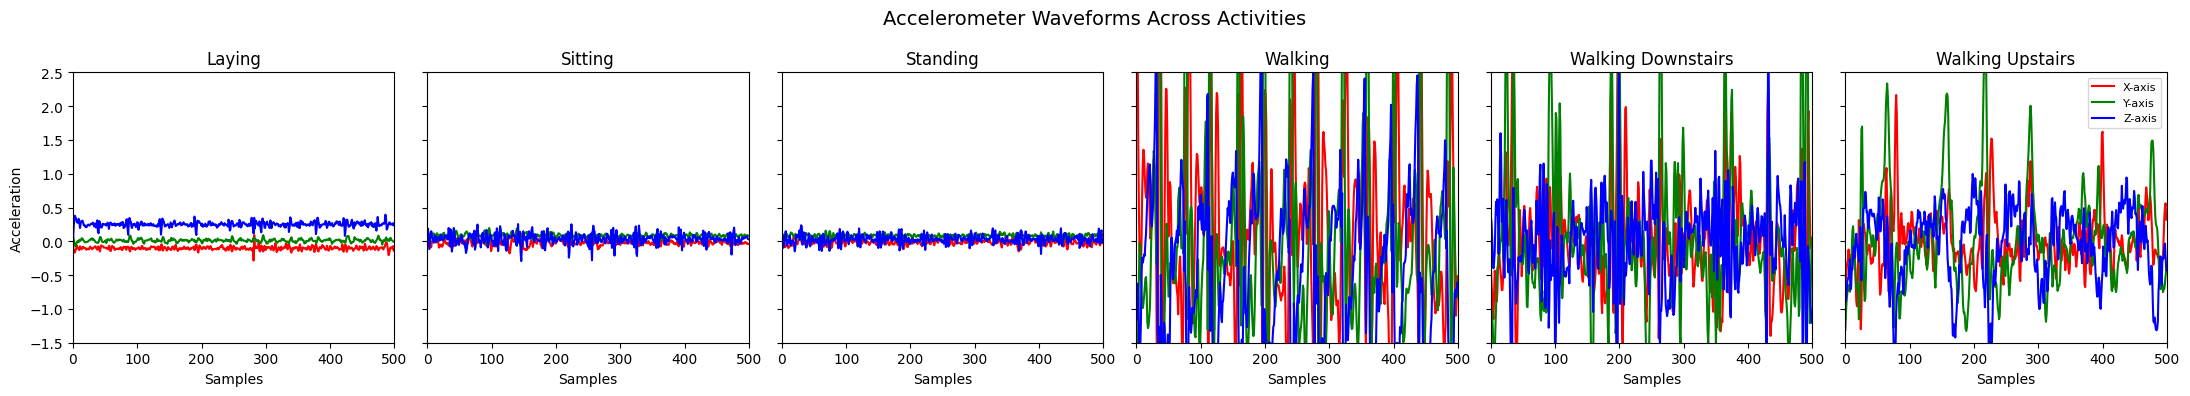

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Activity labels
ACTIVITIES = ["LAYING", "SITTING", "STANDING", 
              "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

def pick_one_file_per_activity(base_dir):
    """
    Selects one CSV file from each activity folder.
    """
    chosen_files = []
    titles = []
    for activity in ACTIVITIES:
        folder = os.path.join(base_dir, activity)
        file = os.listdir(folder)[0]   # take the first CSV
        chosen_files.append(os.path.join(folder, file))
        titles.append(activity.title().replace("_", " "))
    return chosen_files, titles


def plot_activity_signals(file_paths, titles):
    """
    Plots accelerometer signals (X, Y, Z) for each selected activity.
    """
    fig, axes = plt.subplots(1, 6, figsize=(22, 4), sharey=True)
    fig.suptitle("Accelerometer Waveforms Across Activities", fontsize=14)

    for i, (file, ax) in enumerate(zip(file_paths, axes)):
        # Load one sample and trim to first 500 values
        df = pd.read_csv(file).iloc[:500, :]
        print("\n",titles[i])
        print(df.head(3))
        print("SHAPE:",df.shape)

        ax.plot(df["accx"], color="red", label="X-axis")
        ax.plot(df["accy"], color="green", label="Y-axis")
        ax.plot(df["accz"], color="blue", label="Z-axis")

        ax.set_title(titles[i])
        ax.set_xlim([0, 500])
        ax.set_ylim([-1.5, 2.5])
        ax.set_xlabel("Samples")
        if i == 0:
            ax.set_ylabel("Acceleration")
        if i == 5:  # show legend only on last subplot
            ax.legend(fontsize=8, loc="upper right")

    plt.tight_layout()
    plt.show()


# -------- MAIN --------
if __name__ == "__main__":
    base_path = os.path.join("processed_dataset")
    files, titles = pick_one_file_per_activity(base_path)
    plot_activity_signals(files, titles)



#### Question 1
1. Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform? **[1 marks]**

In [6]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data from MakeDataset.py
from MakeDataset import X_train, X_test, y_train, y_test

# Shape of original data from MakeDataset.py
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Flatten X_train and X_test into 2D data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# New data shape
print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Training decision tree using sklearn
model_1 = DecisionTreeClassifier(random_state=42)
model_1.fit(X_train_flat, y_train)

# Get training and test data
X_train_provided = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train_provided = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None).values.ravel()

X_test_provided = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test_provided = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None).values.ravel()

# Check shape
print("X_train_provided shape:", X_train_provided.shape)
print("y_train_provided shape:", y_train_provided.shape)
print("X_test_provided shape:", X_test_provided.shape)
print("y_test_provided shape:", y_test_provided.shape)

# Train decision tree
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_provided, y_train_provided)



Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
X_train shape: (126, 500, 3)
X_test shape: (54, 500, 3)
y_train shape: (126,)
y_test shape: (54,)
X_train_flat shape: (126, 1500)
X_test_flat shape: (54, 1500)
y_train shape: (126,)
y_test shape: (54,)
X_train_provided shape: (7352, 561)
y_train_provided shape: (7352,)
X_test_provided shape: (2947, 561)
y_test_provided shape: (2947,)


DecisionTreeClassifier(random_state=42)

TESTING THE MODEL ON OUR RAW DATASET

In [7]:
import os
import pandas as pd
import numpy as np

# Path where all processed datasets are stored
data_dir = "processed_dataset"
"""1 WALKING 2 WALKING_UPSTAIRS 3 WALKING_DOWNSTAIRS 4 SITTING 5 STANDING 6 LAYING"""
# List of activity folders
activities = ["WALKING", "SITTING", "STANDING", 
              "LAYING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

X_list = []
y_list = []

# Loop over each activity
for i, activity in enumerate(activities):
    activity_path = os.path.join(data_dir, activity)
    
    # Loop over all CSV samples inside this activity folder
    for file in os.listdir(activity_path):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(activity_path, file))
            
            # Use only accx, accy, accz
            X_sample = df[["accx", "accy", "accz"]].values  
            
            # Only accept samples with exactly 500 rows (10s @ 50Hz)
            if X_sample.shape[0] == 500:
                X_list.append(X_sample.reshape(-1))  # flatten (1500 features)
                y_list.append(i+1)  # store label index (0-5)

# Convert to numpy arrays
X_new = np.array(X_list)
y_true = np.array(y_list)

print("X_new shape:", X_new.shape)  # (num_samples, 1500)
print("y_true shape:", y_true.shape)  # (num_samples,)

# Predict activities
y_pred = model_1.predict(X_new)

# Compare predictions with true labels
accuracy = np.mean(y_pred == y_true)
print("Predicted Labels:", y_pred)
print("True Labels:", y_true)
print(f"Accuracy on new samples: {accuracy * 100:.2f}%")


X_new shape: (24, 1500)
y_true shape: (24,)
Predicted Labels: [6 6 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 6 6 6 6 6]
True Labels: [1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6]
Accuracy on new samples: 16.67%


In [10]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Path where all processed datasets are stored
data_dir = "processed_dataset"

# Class mapping (labels from dataset)
classes = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

# List of activity folders in correct label order
activities = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", 
              "SITTING", "STANDING", "LAYING"]

X_list = []
y_list = []

# Loop over each activity
for i, activity in enumerate(activities):
    activity_path = os.path.join(data_dir, activity)
    
    # Loop over all CSV samples inside this activity folder
    for file in os.listdir(activity_path):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(activity_path, file))
            
            # Use only accx, accy, accz
            X_sample = df[["accx", "accy", "accz"]].values  
            
            # Only accept samples with exactly 500 rows (10s @ 50Hz)
            if X_sample.shape[0] == 500:
                X_list.append(X_sample.reshape(-1))  # flatten (1500 features)
                y_list.append(i+1)  # activity labels 1–6

# Convert to numpy arrays
X_new = np.array(X_list)
y_true = np.array(y_list)

print("X_new shape:", X_new.shape)  
print("y_true shape:", y_true.shape)  

# Predict activities with model_1
y_pred = model_1.predict(X_new)

print(y_pred,y_true)

# === Overall Metrics ===
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=[classes[i] for i in sorted(classes.keys())]))

# === Per-class Precision, Recall, Accuracy ===
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

print("\n=== Precision, Recall, Accuracy per Class ===")
for i, class_label in enumerate(sorted(classes.keys())):
    class_accuracy = accuracy_score(y_true == class_label, y_pred == class_label)
    print(f"{classes[class_label]}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, Accuracy = {class_accuracy:.4f}")

# === Macro Averages ===
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print("\n=== Overall Performance ===")
print(f"Overall Precision (Macro): {precision_macro:.4f}")
print(f"Overall Recall (Macro): {recall_macro:.4f}")
print(f"Overall Accuracy: {accuracy:.4f}")

# === Confusion Matrix ===
print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_true, y_pred)
print(cm)


X_new shape: (24, 1500)
y_true shape: (24,)
[6 6 4 6 6 6 6 6 6 6 4 6 6 6 6 6 6 6 6 6 6 6 6 6] [1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6]

=== Classification Report ===
                    precision    recall  f1-score   support

           WALKING       0.00      0.00      0.00         4
  WALKING_UPSTAIRS       0.00      0.00      0.00         4
WALKING_DOWNSTAIRS       0.00      0.00      0.00         4
           SITTING       0.00      0.00      0.00         4
          STANDING       0.00      0.00      0.00         4
            LAYING       0.18      1.00      0.31         4

          accuracy                           0.17        24
         macro avg       0.03      0.17      0.05        24
      weighted avg       0.03      0.17      0.05        24


=== Precision, Recall, Accuracy per Class ===
WALKING: Precision = 0.0000, Recall = 0.0000, Accuracy = 0.8333
WALKING_UPSTAIRS: Precision = 0.0000, Recall = 0.0000, Accuracy = 0.8333
WALKING_DOWNSTAIRS: Precision = 0.0000

c:\users\sonde\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonde\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonde\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [13]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# 1. Load all collected data
# -----------------------------
DATASET_PATH = "processed_dataset"   # change to your path
activities = ["WALKING", "SITTING", "STANDING", "LAYING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

X = []
y = []

for idx, activity in enumerate(activities):
    folder = os.path.join(DATASET_PATH, activity)
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder, file))
            # Use accx, accy, accz only
            acc = df[["accx", "accy", "accz"]].values  
            # Flatten (500 × 3 → 1500 features)
            X.append(acc.flatten())
            y.append(activity)

X = np.array(X)
y = np.array(y)

print("Dataset shape:", X.shape, "Labels:", y.shape)

# -----------------------------
# 2. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# -----------------------------
# 3. Preprocessing (scaling)
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# 4. Train simple model
# -----------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# 5. Predict and Evaluate
# -----------------------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Dataset shape: (24, 1500) Labels: (24,)
Accuracy: 0.375

Classification Report:
                     precision    recall  f1-score   support

            LAYING       0.33      1.00      0.50         1
           SITTING       0.50      1.00      0.67         1
          STANDING       0.50      1.00      0.67         1
           WALKING       0.00      0.00      0.00         2
WALKING_DOWNSTAIRS       0.00      0.00      0.00         2
  WALKING_UPSTAIRS       0.00      0.00      0.00         1

          accuracy                           0.38         8
         macro avg       0.22      0.50      0.31         8
      weighted avg       0.17      0.38      0.23         8



c:\users\sonde\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonde\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonde\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo